<a href="https://colab.research.google.com/github/carlos-alves-one/-NeuroCredit/blob/master/artificial_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### Author.....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 27/03/2023
### FYP..........: NeuroCredit

## I. Import Libraries and Packages

In [137]:
# Importing the library numpy for mathematical operations
import numpy as np

# Importing the pandas library to read the data
import pandas as pd

# Importing the StandardScaler module to scale the data
from sklearn.preprocessing import StandardScaler

# Importing module to split the data into training and test sets
from sklearn.model_selection import train_test_split

# Importing the metrics module to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing the matplotlib library for plotting
import matplotlib.pyplot as plt

## II. Activation Function (Sigmoid)

In [138]:
# Defining the sigmoid function
def sigmoid(x):

  # Applying the sigmoid function on x and returning the value
  return 1 / (1 + np.exp(-x))

## III. Derivative of the Activation Function

In [139]:
# Defining the sigmoid derivative function
def sigmoid_derivative(x):

  # Applying the sigmoid derivative function on x and returning the value
  return x * (1 - x)

## IV. Mean Squared Error Loss Function

In [140]:
# Defining the mean squared error loss function
def mse_loss(y_true, y_pred):

  # Calculating the mean squared error loss and returning the value
  return np.mean((y_true - y_pred)**2)

## V. Artificial Neural Network Architecture

In [141]:
# Defining the number of input nodes
input_nodes = 7

# Defining the number of hidden nodes
hidden_nodes = 10

# Defining the number of output nodes
output_nodes = 1

## VI. Weights and Biases Initialization

In [142]:
# Setting the random seed
np.random.seed(0)

# Initializing the weights of the input layer 
weights_input_hidden = np.random.rand(input_nodes, hidden_nodes)

# Initializing the weights of the hidden layer
weights_hidden_output = np.random.rand(hidden_nodes, output_nodes)

# Initializing the biases of the hidden layer
bias_hidden = np.random.rand(hidden_nodes)

# Initializing the biases of the output layer
bias_output = np.random.randn(1, output_nodes)

## VII. Learning Rate

In [143]:
# Defining the learning rate
lr = 0.1

## VIII. Train the Artificial Neural Network

In [144]:
# Defining the train function
def train(X_train, y_train, epochs):
    # Defining the global variables
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output
    
    # Initialize the lowest and highest MSE values and their corresponding epoch numbers
    lowest_mse = float('inf')
    highest_mse = float('-inf')
    lowest_mse_epoch = 0
    highest_mse_epoch = 0

    # Iterating over the number of epochs
    for epoch in range(epochs):

        #============== Forward pass ==============#

        # Calculating the input to the hidden layer
        hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden

        # Calculating the output of the hidden layer
        hidden_layer_output = sigmoid(hidden_layer_input)

        # Calculating the input to the output layer
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output

        # Calculating the output of the output layer
        output_layer_output = sigmoid(output_layer_input)

        #============== Calculate the error (mean squared error) ==============#

        # Calculating the error in the output layer
        output_error = y_train - output_layer_output

        # Calculating the mean squared error
        mse = mse_loss(y_train, output_layer_output)

        # Update the lowest and highest MSE values and their corresponding epoch numbers
        if mse < lowest_mse:
            lowest_mse = mse
            lowest_mse_epoch = epoch + 1

        if mse > highest_mse:
            highest_mse = mse
            highest_mse_epoch = epoch + 1

        #==================== Backpropagation ====================#

        # Calculating the gradient of the output layer
        output_delta = output_error * sigmoid_derivative(output_layer_output)

        # Calculating the error in the hidden layer
        hidden_error = np.dot(output_delta, weights_hidden_output.T)

        # Calculating the gradient of the hidden layer
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        #=============== Update weights and biases ===============#

        # Updating the weights of the hidden layer
        weights_hidden_output += np.dot(hidden_layer_output.T, output_delta) * lr

        # Updating the weights of the input layer
        weights_input_hidden += np.dot(X_train.T, hidden_delta) * lr

        # Updating the biases of the output layer
        bias_output += np.sum(output_delta, axis=0) * lr

        # Updating the biases of the hidden layer
        bias_hidden += np.sum(hidden_delta, axis=0) * lr

    # Print the lowest and highest MSE values and their corresponding epoch numbers
    print(f">> Lowest MSE...:  {lowest_mse * 100:.2f}% at Epoch {lowest_mse_epoch}")
    print(f">> Highest MSE..: {highest_mse * 100:.2f}% at Epoch {highest_mse_epoch}")


## IX. Predict the Output

In [145]:
# Defining the predict function
def predict(X_test):

  # Calculating the input to the hidden layer
  hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden

  # Calculating the output of the hidden layer
  hidden_layer_output = sigmoid(hidden_layer_input)

  # Calculating the input to the output layer
  output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output

  # Calculating the output of the output layer
  output_layer_output = sigmoid(output_layer_input)

  # Returning the output of the output layer
  return np.round(output_layer_output)
  

## X. Loading the Dataset and Pre-Processing

### a. Prepare the Dataset

In [146]:
# Reading the data with credit loans data
data = pd.read_csv('data.csv')

# Get the list of columns with int64 data type
int_columns = data.select_dtypes(include=['int64']).columns

# Convert the int64 columns to float64 columns
data[int_columns] = data[int_columns].astype('float64')

# Create a new dataframe with the columns that are highly correlated with the income
data_new = data[['income',
                'assets_value',
                'debt_to_income_ratio',
                'length_of_credit_history',
                'number_of_credit_accounts',
                'number_of_credit_accounts_opened_last_12_months',
                'saving_account_balance',
                'approval_status']]

# Print the first 5 rows of the new dataframe
data_new.head().T

,0,1,2,3,4
income,46319.0,15480.0,21614.0,25874.0,20389.0
assets_value,14680.0,46713.0,13026.0,27908.0,44309.0
debt_to_income_ratio,41.0,82.0,68.0,34.0,75.0
length_of_credit_history,24.0,0.0,99.0,55.0,30.0
number_of_credit_accounts,3.0,3.0,4.0,4.0,0.0
number_of_credit_accounts_opened_last_12_months,4.0,2.0,2.0,2.0,5.0
saving_account_balance,10207.0,16666.0,10413.0,16645.0,16366.0
approval_status,Rejected,Rejected,Rejected,Rejected,Rejected


### b. Select Features and Target

In [147]:
# Map the approval_status column to numerical values (0 for "Rejected" and 1 for "Approved")
data_new['approval_status'] = data_new['approval_status'].map({"Rejected": 0, "Approved": 1})

# Store the features in the X variable and the target in the y variable
X = data_new.drop('approval_status', axis=1)
y = data_new['approval_status']


<ipython-input-147-d849f0cc14ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['approval_status'] = data_new['approval_status'].map({"Rejected": 0, "Approved": 1})


### c. Standardize the Features

In [148]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

### d. Split the Dataset into Train and Test Sets

In [149]:
# Create the X_train, X_test, y_train, y_test variables by splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape y_train and y_test arrays to be 1-dimensional
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

## XI. Train the Artifical Neural Network 

In [150]:
# Defining the number of epochs
epochs = 1000

# Training the neural network
train(X_train, y_train, epochs)

>> Lowest MSE...:  6.40% at Epoch 1000
>> Highest MSE..: 82.44% at Epoch 1


## XII. Make Predictions and Evaluate the Model

In [151]:
# Making predictions on the test set
y_pred = predict(X_test)

### a. Classification Report

In [159]:
# Printing the classification report
print("Artificial Neural Networks Classification Report:")
print(classification_report(y_test, y_pred))

Artificial Neural Networks Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       176
           1       0.25      0.08      0.12        24

    accuracy                           0.86       200
   macro avg       0.57      0.52      0.52       200
weighted avg       0.81      0.86      0.83       200



### b. Confusion Matrix

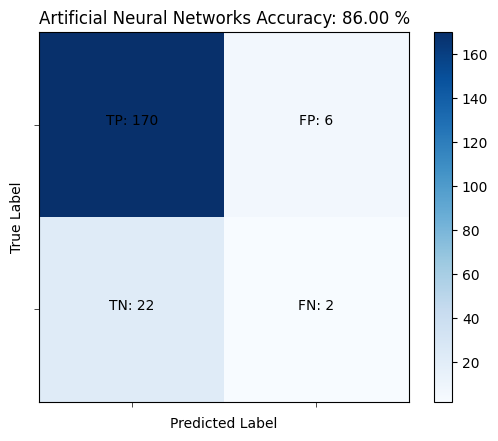

In [153]:
# Plot the confusion matrix

# Store the result of the confusion matrix in a variable
cm = confusion_matrix(y_test, y_pred)

# Store the accuracy of the model in a variable
accuracy = accuracy_score(y_test, y_pred)

# Set the default style for plots to have a white background
plt.style.use('default')

# Set the plot visual the confusion matrix using varying shades of blue
plt.imshow(cm, cmap=plt.cm.Blues)